In [1]:
# /work/gallim/anaconda3/envs/hgg-coffea/bin/python + install ROOT with mamba if needed 

import awkward as ak
import uproot 
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import pandas as pd
import vector
hep.style.use("CMS")

In [2]:
output_dir = "/eos/home-g/gallim/www/plots/Hgg/NanoMicroCompare"

In [3]:
nanoaod_files_dir = "/work/gallim/devel/HiggsDNA_studies/out/test/GluGluHToGG_M125_TuneCP5_13TeV-amcatnloFXFX-pythia8"
nanoaod_arr = ak.from_parquet(nanoaod_files_dir)

In [4]:
microaod_files_dir = "/pnfs/psi.ch/cms/trivcat/store/user/gallim/root_files/nanoaod_comparison_phoid_eb_smearing_uncorr"

microaod_arr = uproot.concatenate(["{}/*.root:diphotonDumper/trees/ggH_125_13TeV_All_$SYST".format(microaod_files_dir)])
if "lead_ch_iso_worst__uncorr" in microaod_arr.fields:
    microaod_arr["lead_ch_iso_worst_uncorr"] = microaod_arr["lead_ch_iso_worst__uncorr"]

In [5]:
# Temporary: consider barrel only
#nanoaod_arr["lead_mvaID_recomputed"] = 2. / (1. + np.exp(-2 * (nanoaod_arr.lead_mvaID_recomputed + 1.0))) - 1.
#nanoaod_arr["sublead_mvaID_recomputed"] = 2. / (1. + np.exp(-2 * (nanoaod_arr.sublead_mvaID_recomputed + 1.0))) - 1.

nanoaod_arr = nanoaod_arr[np.abs(nanoaod_arr.lead_eta) < 1.5]
microaod_arr = microaod_arr[np.abs(microaod_arr.lead_eta) < 1.5]
nanoaod_arr = nanoaod_arr[np.abs(nanoaod_arr.sublead_eta) < 1.5]
microaod_arr = microaod_arr[np.abs(microaod_arr.sublead_eta) < 1.5]

In [6]:
columns = [
    {
        "nano_col": "lead_energyRaw",
        "micro_col": "lead_SCRawE",
        "bins": 100,
        "range": (0, 300),
        "var": "$E_{\gamma, 1}$"
    },
    {
        "nano_col": "sublead_energyRaw",
        "micro_col": "sublead_SCRawE",
        "bins": 100,
        "range": (0, 300),
        "var": "$E_{\gamma, 2}$"
    },
    {
        "nano_col": "lead_r9",
        "micro_col": "lead_r9",
        "bins": 100,
        "range": (0.4, 1.1),
        "var": "$R_{9, 1}$"
    },
    {
        "nano_col": "sublead_r9",
        "micro_col": "sublead_r9",
        "bins": 100,
        "range": (0.4, 1.1),
        "var": "$R_{9, 2}$"
    },
    {
        "nano_col": "lead_uncorr_r9",
        "micro_col": "lead_r9_uncorr",
        "bins": 100,
        "range": (0.4, 1.1),
        "var": "$R_{9-uncorrected, 1}$"
    },
    {
        "nano_col": "lead_sieie",
        "micro_col": "lead_sieie",
        "bins": 100,
        "range": (0, 0.02),
        "var": "$\sigma_{ieie, 1}$"
    },
    {
        "nano_col": "sublead_sieie",
        "micro_col": "sublead_sieie",
        "bins": 100,
        "range": (0, 0.02),
        "var": "$\sigma_{ieie, 2}$"
    },
    {
        "nano_col": "lead_uncorr_sieie",
        "micro_col": "lead_sieie_uncorr",
        "bins": 100,
        "range": (0, 0.02),
        "var": "$\sigma_{ieie-uncorrected, 1}$"
    },
    {
        "nano_col": "lead_etaWidth",
        "micro_col": "lead_eta_width",
        "bins": 100,
        "range": (0, 0.03),
        "var": "$\eta_{width, 1}$"
    },
    {
        "nano_col": "sublead_etaWidth",
        "micro_col": "sublead_eta_width",
        "bins": 100,
        "range": (0, 0.03),
        "var": "$\eta_{width, 2}$"
    },
    {
        "nano_col": "lead_uncorr_etaWidth",
        "micro_col": "lead_eta_width_uncorr",
        "bins": 100,
        "range": (0, 0.03),
        "var": "$\eta_{width-uncorrected, 1}$"
    },
    {
        "nano_col": "lead_phiWidth",
        "micro_col": "lead_phi_width",
        "bins": 100,
        "range": (0, 0.1),
        "var": "$\phi_{width, 1}$"
    },
    {
        "nano_col": "sublead_phiWidth",
        "micro_col": "sublead_phi_width",
        "bins": 100,
        "range": (0, 0.1),
        "var": "$\phi_{width, 2}$"
    },
    {
        "nano_col": "lead_uncorr_phiWidth",
        "micro_col": "lead_phi_width_uncorr",
        "bins": 100,
        "range": (0, 0.1),
        "var": "$\phi_{width-uncorrected, 1}$"
    },
    {
        "nano_col": "lead_sieip",
        "micro_col": "lead_sieip",
        "bins": 100,
        "range": (-0.0004, 0.0004),
        "var": "$\sigma_{ieip, 1}$"
    },
    {
        "nano_col": "sublead_sieip",
        "micro_col": "sublead_sieip",
        "bins": 100,
        "range": (-0.0004, 0.0004),
        "var": "$\sigma_{ieip, 2}$"
    },
    {
        "nano_col": "lead_uncorr_sieip",
        "micro_col": "lead_sieip_uncorr",
        "bins": 100,
        "range": (-0.0004, 0.0004),
        "var": "$\sigma_{ieip-uncorrected, 1}$"
    },
    {
        "nano_col": "lead_s4",
        "micro_col": "lead_s4",
        "bins": 100,
        "range": (0.4, 1),
        "var": "$S4_1$"
    },   
    {
        "nano_col": "sublead_s4",
        "micro_col": "sublead_s4",
        "bins": 100,
        "range": (0.4, 1),
        "var": "$S4_2$"
    },
    {
        "nano_col": "lead_pfPhoIso03",
        "micro_col": "lead_pho_iso",
        "bins": 100,
        "range": (0, 1),
        "var": "$PhotonIso_{1}$"
    },
    {
        "nano_col": "sublead_pfPhoIso03",
        "micro_col": "sublead_pho_iso",
        "bins": 100,
        "range": (0, 1),
        "var": "$PhotonIso_{2}$"
    },
    {
        "nano_col": "lead_uncorr_pfPhoIso03",
        "micro_col": "lead_pho_iso_uncorr",
        "bins": 100,
        "range": (0, 1),
        "var": "$PhotonIso_{uncorrected, 1}$"
    },
    {
        "nano_col": "lead_pfChargedIsoPFPV",
        "micro_col": "lead_ch_iso",
        "bins": 100,
        "range": (0, 5),
        "var": "$ChargedIso_{1}$"
    },
    {
        "nano_col": "sublead_pfChargedIsoPFPV",
        "micro_col": "sublead_ch_iso",
        "bins": 100,
        "range": (0, 5),
        "var": "$ChargedIso_{2}$"
    },
    {
        "nano_col": "lead_uncorr_pfChargedIsoPFPV",
        "micro_col": "lead_ch_iso_uncorr",
        "bins": 100,
        "range": (0, 5),
        "var": "$ChargedIso_{uncorrected, 1}$"
    },
    {
        "nano_col": "lead_pfChargedIsoWorstVtx",
        "micro_col": "lead_ch_iso_worst",
        "bins": 100,
        "range": (0, 10),
        "var": "$ChargedIsoWorst_{1}$"
    },
    {
        "nano_col": "sublead_pfChargedIsoWorstVtx",
        "micro_col": "sublead_ch_iso_worst",
        "bins": 100,
        "range": (0, 10),
        "var": "$ChargedIsoWorst_{2}$"
    },
    {
        "nano_col": "lead_uncorr_pfChargedIsoWorstVtx",
        "micro_col": "lead_ch_iso_worst_uncorr",
        "bins": 100,
        "range": (0, 10),
        "var": "$ChargedIsoWorst_{uncorrected, 1}$"
    },
    {
        "nano_col": "lead_eta",
        "micro_col": "lead_eta",
        "bins": 100,
        "range": (-3, 3),
        "var": "lead $\eta$"
    },
    {
        "nano_col": "sublead_eta",
        "micro_col": "sublead_eta",
        "bins": 100,
        "range": (-3, 3),
        "var": "sublead $\eta$"
    },
    
    
    
    {
        "nano_col": "mass",
        "micro_col": "mass",
        "bins": 100,
        "range": (100, 140),
        "var": "$m_{H}$"
    },
    {
        "nano_col": "lead_mvaID_recomputed",
        "micro_col": "lead_mva",
        "bins": 100,
        "range": (0, 1),
        "var": "lead PhoIdMVA (reco)"
    },
    {
        "nano_col": "sublead_mvaID_recomputed",
        "micro_col": "sublead_mva",
        "bins": 100,
        "range": (0, 1),
        "var": "sublead PhoIdMVA (reco)"
    },
    {
        "nano_col": "lead_mvaID", # comes directly from central nanoaod, where no corrections are applied
        "micro_col": "lead_mva_uncorr", 
        "bins": 100,
        "range": (0, 1),
        "var": "lead PhoIdMVA (uncorrected, non recomputed)"
    },
    #{
    #    "nano_col": "lead_mvaID_Fall17V1p1",
    #    "micro_col": "lead_mva_uncorr",
    #    "bins": 100,
    #    "range": (0, 1),
    #    "var": "lead PhoIdMVA uncorr"
    #},
    {
        "nano_col": "lead_pt",
        "micro_col": "leadPt",
        "bins": 100,
        "range": (0, 200),
        "var": "lead $p_{t}$"
    },
    {
        "nano_col": "sublead_pt",
        "micro_col": "subleadPt",
        "bins": 100,
        "range": (0, 200),
        "var": "sublead $p_{t}$"
    },
    {
        "nano_col": "eta",
        "micro_col": "eta",
        "bins": 100,
        "range": (-3, 3),
        "var": "$\eta$"
    },
    {
        "nano_col": "lead_phi",
        "micro_col": "lead_phi",
        "bins": 100,
        "range": (-3, 3),
        "var": "lead $\phi$"
    },
    {
        "nano_col": "sublead_phi",
        "micro_col": "sublead_phi",
        "bins": 100,
        "range": (-3, 3),
        "var": "sublead $\phi$"
    },
]

# Create dict where keys are names of variables in nano and values are names of variables in micro
nano_micro_names = {var["nano_col"]: var["micro_col"] for var in columns}
nano_micro_names["event"] = "event"
nano_micro_names["lumi"] = "lumi"

In [7]:
# Event by event

nano_dict = {k: nanoaod_arr[k] for k in nano_micro_names.keys()}
nano_dict["lead_fixedGridRhoAll"] = nanoaod_arr["lead_fixedGridRhoAll"]
test_nano = ak.Array(nano_dict)

test_micro = microaod_arr[nano_micro_names.values()]

pd_nano = ak.to_pandas(test_nano)
pd_micro = ak.to_pandas(test_micro)

In [8]:
pd_nano = pd_nano.set_index(["event", "lumi"])
pd_micro = pd_micro.set_index(["event", "lumi"])

In [9]:
pd_joined = pd_nano.join(pd_micro, lsuffix="_nano", rsuffix="_micro")

In [10]:
pd_joined

,,lead_energyRaw,sublead_energyRaw,lead_r9_nano,sublead_r9_nano,lead_uncorr_r9,lead_sieie_nano,sublead_sieie_nano,lead_uncorr_sieie,lead_etaWidth,sublead_etaWidth,...,sublead_eta_micro,mass_micro,lead_mva,sublead_mva,lead_mva_uncorr,leadPt,subleadPt,eta_micro,lead_phi_micro,sublead_phi_micro
event,lumi,,,,,,,,,,,,,,,,,,,,,
312486,993,97.06250,47.90625,0.945210,0.963451,0.947754,0.008739,0.006967,0.008339,0.008922,0.004817,...,-0.104426,123.779465,0.928564,0.892852,0.947891,50.966026,50.561424,1.738853,-0.040428,-2.602050
312554,993,105.06250,50.03125,0.958921,0.967304,0.959473,0.009646,0.009018,0.008865,0.009354,0.009252,...,-0.151494,129.341064,0.670585,0.909896,0.883745,66.035065,51.280624,-2.461035,-2.587905,0.431134
312573,993,75.50000,85.81250,0.987005,0.653553,0.985840,0.009046,0.008745,0.009338,0.005700,0.009592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312556,993,62.71875,54.43750,0.972729,0.529897,0.972168,0.009231,0.008521,0.009041,0.007549,0.018935,...,1.298696,123.600807,0.982025,-0.530641,0.979629,50.999470,31.626795,0.615116,0.987806,-2.433177
312545,993,78.25000,52.09375,0.970086,0.997380,0.969727,0.009478,0.009187,0.009315,0.005895,0.006209,...,0.008641,123.103256,0.975003,0.977167,0.982366,77.070213,53.883324,0.433121,1.119504,-2.680457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446111,4591,135.37500,38.31250,0.971918,0.992714,0.970703,0.009270,0.009226,0.009056,0.006318,0.007125,...,0.182588,125.238884,0.946728,0.523742,0.980745,80.504456,39.598019,1.736846,0.697522,-2.734129
1446144,4591,134.62500,123.62500,0.969351,0.932917,0.972168,0.010165,0.009217,0.009727,0.005747,0.006905,...,-1.278675,128.818817,0.968967,0.762094,0.974409,69.216774,64.198982,-2.566003,2.738902,-0.924776
1446149,4591,212.12500,41.34375,0.957284,0.974526,0.957031,0.009013,0.009665,0.009445,0.006841,0.008467,...,-0.746629,124.744507,0.784214,0.569833,0.757586,209.813431,32.291584,-0.295306,-2.430266,2.300311


In [11]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    #print(pd_joined[["lead_pfChargedIsoWorstVtx", "lead_ch_iso_worst"]][pd_joined["lead_ch_iso_worst"] < 0.1])

In [12]:
for nano_name, micro_name in nano_micro_names.items():
    if nano_name in ["event", "lumi"]:
        break
    if nano_name == micro_name:
        nano_name += "_nano"
        micro_name += "_micro"
    pd_joined = pd_joined[pd_joined[nano_name].notna()]
    pd_joined = pd_joined[pd_joined[micro_name].notna()]

In [13]:
# Cut over delta R
# Here https://github.com/CoffeaTeam/coffea/blob/3db3fab23064c70d0ca63b185d51c7fa3b7849dc/coffea/nanoevents/methods/vector.py#L74
# you can find how it is defined

four_lead_nano = vector.obj(
    pt=pd_joined["lead_pt"],
    phi=pd_joined["lead_phi_nano"],
    eta=pd_joined["lead_eta_nano"],
    E=pd_joined["lead_energyRaw"]
)

four_sublead_nano = vector.obj(
    pt=pd_joined["sublead_pt"],
    phi=pd_joined["sublead_phi_nano"],
    eta=pd_joined["sublead_eta_nano"],
    E=pd_joined["sublead_energyRaw"]
)

four_lead_micro = vector.obj(
    pt=pd_joined["leadPt"],
    phi=pd_joined["lead_phi_micro"],
    eta=pd_joined["lead_eta_micro"],
    E=pd_joined["lead_SCRawE"]
)

four_sublead_micro = vector.obj(
    pt=pd_joined["subleadPt"],
    phi=pd_joined["sublead_phi_micro"],
    eta=pd_joined["sublead_eta_micro"],
    E=pd_joined["sublead_SCRawE"]
)

pd_joined["lead_deltaR"] = four_lead_nano.deltaR(four_lead_micro)
pd_joined["sublead_deltaR"] = four_sublead_nano.deltaR(four_sublead_micro)
pd_joined = pd_joined[pd_joined["lead_deltaR"] < 0.1]
pd_joined = pd_joined[pd_joined["sublead_deltaR"] < 0.1]

In [14]:
pd_joined

,,lead_energyRaw,sublead_energyRaw,lead_r9_nano,sublead_r9_nano,lead_uncorr_r9,lead_sieie_nano,sublead_sieie_nano,lead_uncorr_sieie,lead_etaWidth,sublead_etaWidth,...,lead_mva,sublead_mva,lead_mva_uncorr,leadPt,subleadPt,eta_micro,lead_phi_micro,sublead_phi_micro,lead_deltaR,sublead_deltaR
event,lumi,,,,,,,,,,,,,,,,,,,,,
312486,993,97.06250,47.90625,0.945210,0.963451,0.947754,0.008739,0.006967,0.008339,0.008922,0.004817,...,0.928564,0.892852,0.947891,50.966026,50.561424,1.738853,-0.040428,-2.602050,0.007763,0.014582
312554,993,105.06250,50.03125,0.958921,0.967304,0.959473,0.009646,0.009018,0.008865,0.009354,0.009252,...,0.670585,0.909896,0.883745,66.035065,51.280624,-2.461035,-2.587905,0.431134,0.000105,0.000043
312556,993,62.71875,54.43750,0.972729,0.529897,0.972168,0.009231,0.008521,0.009041,0.007549,0.018935,...,0.982025,-0.530641,0.979629,50.999470,31.626795,0.615116,0.987806,-2.433177,0.000014,0.000132
312545,993,78.25000,52.09375,0.970086,0.997380,0.969727,0.009478,0.009187,0.009315,0.005895,0.006209,...,0.975003,0.977167,0.982366,77.070213,53.883324,0.433121,1.119504,-2.680457,0.000121,0.000207
312572,993,63.87500,39.09375,0.963859,0.586073,0.965820,0.008708,0.007721,0.009422,0.008121,0.004915,...,0.829338,0.923660,0.914683,46.145721,27.345711,0.350411,1.770383,-0.542480,0.000128,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446056,4591,91.06250,46.75000,0.792958,0.978217,0.801270,0.008152,0.008790,0.008293,0.009041,0.009048,...,-0.014969,0.950523,0.346710,66.890633,47.494541,-1.214591,-1.233920,1.365965,0.000059,0.000007
1446111,4591,135.37500,38.31250,0.971918,0.992714,0.970703,0.009270,0.009226,0.009056,0.006318,0.007125,...,0.946728,0.523742,0.980745,80.504456,39.598019,1.736846,0.697522,-2.734129,0.000035,0.000243
1446144,4591,134.62500,123.62500,0.969351,0.932917,0.972168,0.010165,0.009217,0.009727,0.005747,0.006905,...,0.968967,0.762094,0.974409,69.216774,64.198982,-2.566003,2.738902,-0.924776,0.000134,0.000114


In [15]:
pd_joined.columns

Index(['lead_energyRaw', 'sublead_energyRaw', 'lead_r9_nano',
       'sublead_r9_nano', 'lead_uncorr_r9', 'lead_sieie_nano',
       'sublead_sieie_nano', 'lead_uncorr_sieie', 'lead_etaWidth',
       'sublead_etaWidth', 'lead_uncorr_etaWidth', 'lead_phiWidth',
       'sublead_phiWidth', 'lead_uncorr_phiWidth', 'lead_sieip_nano',
       'sublead_sieip_nano', 'lead_uncorr_sieip', 'lead_s4_nano',
       'sublead_s4_nano', 'lead_pfPhoIso03', 'sublead_pfPhoIso03',
       'lead_uncorr_pfPhoIso03', 'lead_pfChargedIsoPFPV',
       'sublead_pfChargedIsoPFPV', 'lead_uncorr_pfChargedIsoPFPV',
       'lead_pfChargedIsoWorstVtx', 'sublead_pfChargedIsoWorstVtx',
       'lead_uncorr_pfChargedIsoWorstVtx', 'lead_eta_nano', 'sublead_eta_nano',
       'mass_nano', 'lead_mvaID_recomputed', 'sublead_mvaID_recomputed',
       'lead_mvaID', 'lead_pt', 'sublead_pt', 'eta_nano', 'lead_phi_nano',
       'sublead_phi_nano', 'lead_fixedGridRhoAll', 'lead_SCRawE',
       'sublead_SCRawE', 'lead_r9_micro', 'sublead

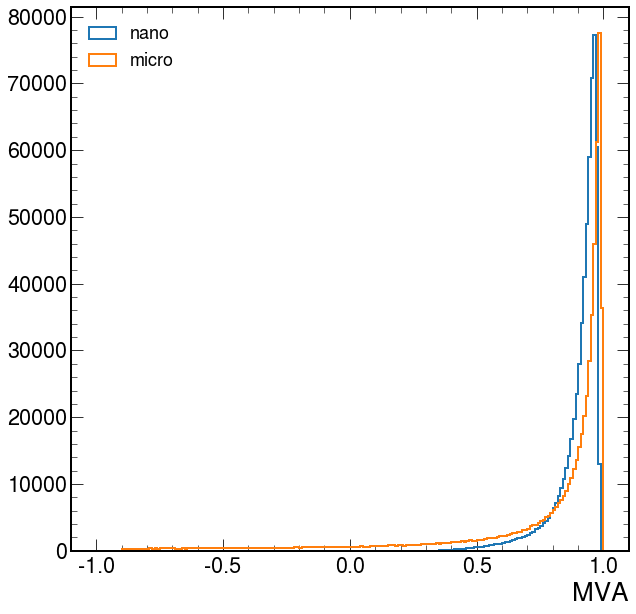

In [16]:
bins = 200
rng = (-1, 1)

pd_joined["lead_mvaID_rec"] = 1./(1. + np.exp(-(pd_joined["lead_mvaID_recomputed"] + 1)))
#pd_joined["lead_mvaID_rec"] = np.exp(pd_joined["lead_mvaID_recomputed"])/(1. + np.exp(pd_joined["lead_mvaID_recomputed"]))
#pd_joined["lead_mvaID_rec"] = 2./(1. + np.exp(-2 * (pd_joined["lead_mvaID_recomputed"] + 1.0))) - 1.

fig, ax = plt.subplots()

n, n_, n__ = ax.hist(pd_joined["lead_mvaID_rec"], bins=bins, range=rng, histtype="step", label="nano", linewidth=2)
m, m_, m__ = ax.hist(pd_joined["lead_mva"], bins=bins, range=rng, histtype="step", label="micro", linewidth=2)

ax.set_xlabel("MVA")
ax.legend(fontsize=18, loc="upper left")

In [17]:
max(pd_joined["lead_mvaID_recomputed"])

3.7741408348083496

In [ ]:
for column in columns:
    fig, (up, down) = plt.subplots(
        nrows=2,
        ncols=1,
        gridspec_kw={"height_ratios": (1, 1)}
        )
    
    nano_name = column["nano_col"]
    micro_name = column["micro_col"]
    
    if nano_name == micro_name:
        nano_name += "_nano"
        micro_name += "_micro"
    
    n, n_, n__ = up.hist(pd_joined[nano_name], bins=column["bins"], range=column["range"], histtype="step", label="NanoAOD", linewidth=2)
    m, m_, m__ = up.hist(pd_joined[micro_name], bins=column["bins"], range=column["range"], histtype="step", label="MicroAOD", linewidth=2)
    
    up.set_xlabel(column["var"])
    up.legend(fontsize=18, loc="upper right")
    
    down.hist(100 * (pd_joined[nano_name] - pd_joined[micro_name]) / pd_joined[micro_name], 
              bins=500,
              range=(-100, 100),
              histtype="step",
              density=True,
              linewidth=2)
    down.set_xlabel("$(n - \mu)/\mu$ [%]")
    down.set_yscale("log")
    
    print(column["nano_col"])
    print("nano: {}".format(np.sum(n)))
    print("micro: {}".format(np.sum(m)))
    print("diff = {}".format(abs(np.sum(n) - np.sum(m))))
    print("rel diff = {}%\n".format(100 * abs(np.sum(n) - np.sum(m)) / max(np.sum(n), np.sum(m))))
    
    fig.tight_layout()
    
    fig.savefig("{}/{}.png".format(output_dir, column["nano_col"]), bbox_inches='tight')
    fig.savefig("{}/{}.pdf".format(output_dir, column["nano_col"]), bbox_inches='tight')

## Corr - Uncorr Comparison

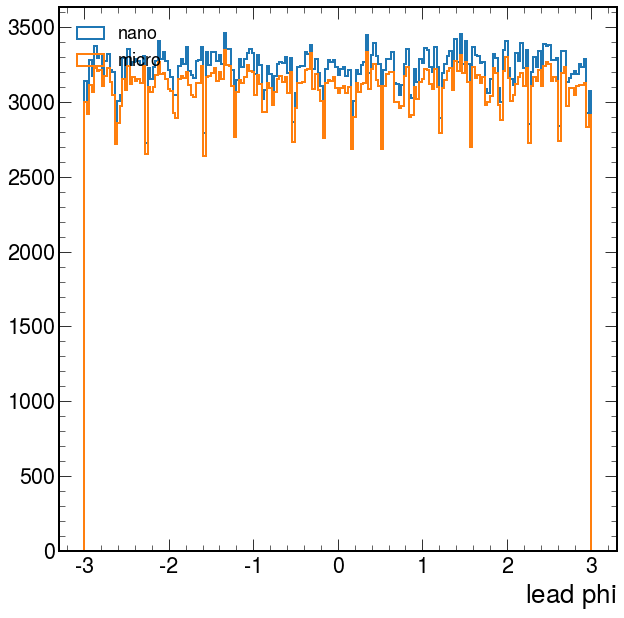

In [10]:
bins = 200
rng = (-3, 3)

fig, ax = plt.subplots()

n, n_, n__ = ax.hist(nanoaod_arr.lead_, bins=bins, range=rng, histtype="step", label="nano", linewidth=2)
m, m_, m__ = ax.hist(microaod_arr.lead_phi, bins=bins, range=rng, histtype="step", label="micro", linewidth=2)

ax.set_xlabel("lead $phi$")
ax.legend(fontsize=18, loc="upper left")

In [ ]:
bins = 100
rng = (0, 0.02)

fig, ax = plt.subplots()

n, n_, n__ = ax.hist(pd_joined["lead_sieie_uncorr"], bins=bins, range=rng, histtype="step", label="micro uncorr", linewidth=2)
m, m_, m__ = ax.hist(pd_joined["lead_sieie_micro"], bins=bins, range=rng, histtype="step", label="micro corr", linewidth=2)

ax.set_xlabel("sieie")
ax.legend(fontsize=18, loc="upper left")

In [ ]:
bins = 100
rng = (0, 0.03)

fig, ax = plt.subplots()

n, n_, n__ = ax.hist(pd_joined["lead_eta_width_uncorr"], bins=bins, range=rng, histtype="step", label="micro uncorr", linewidth=2)
m, m_, m__ = ax.hist(pd_joined["lead_eta_width"], bins=bins, range=rng, histtype="step", label="micro corr", linewidth=2)

ax.set_xlabel("$\eta$")
ax.legend(fontsize=18, loc="upper left")

In [ ]:
bins = 100
rng = (0, 10)

fig, ax = plt.subplots()

n, n_, n__ = ax.hist(pd_joined["lead_ch_iso_worst_uncorr"], bins=bins, range=rng, histtype="step", label="micro uncorr", linewidth=2)
m, m_, m__ = ax.hist(pd_joined["lead_ch_iso_worst"], bins=bins, range=rng, histtype="step", label="micro corr", linewidth=2)

ax.set_xlabel("$(n - \mu)/\mu [%\]$")
ax.legend(fontsize=18, loc="upper left")

In [ ]:
bins = 100
rng = (0, 0.03)

fig, ax = plt.subplots()

n, n_, n__ = ax.hist(pd_joined["lead_uncorr_etaWidth"], bins=bins, range=rng, histtype="step", label="micro uncorr", linewidth=2)
m, m_, m__ = ax.hist(pd_joined["lead_etaWidth"], bins=bins, range=rng, histtype="step", label="micro corr", linewidth=2)

ax.set_xlabel("$\eta$")
ax.legend(fontsize=18, loc="upper left")

## Try converting flashgg weights

In [ ]:
columns_noic = [ 
    {
        "nano_col": "lead_r9",
        "micro_col": "lead_r9",
        "bins": 100,
        "range": (0.4, 1.1),
        "var": "$R_{9, 1}$"
    },
    {
        "nano_col": "lead_uncorr_r9",
        "micro_col": "lead_r9_uncorr",
        "bins": 100,
        "range": (0.4, 1.1),
        "var": "$R_{9-uncorrected, 1}$"
    }
]

nano_micro_names_noic = {var["nano_col"]: var["micro_col"] for var in columns_noic}
nano_micro_names_noic["event"] = "event"
nano_micro_names_noic["lumi"] = "lumi"

nanoaod_files_dir_noic = "/work/gallim/devel/HiggsDNA_studies/out/test_noimperialforr9/GluGluHToGG_M125_TuneCP5_13TeV-amcatnloFXFX-pythia8"
nanoaod_arr_noic = ak.from_parquet(nanoaod_files_dir_noic)

# consider barrel only
nanoaod_arr_noic = nanoaod_arr_noic[np.abs(nanoaod_arr_noic.eta) < 1.5]

test_nano_noic = ak.Array({k: nanoaod_arr_noic[k] for k in nano_micro_names_noic.keys()})
test_micro_noic = microaod_arr[nano_micro_names_noic.values()]

pd_nano_noic = ak.to_pandas(test_nano_noic)
pd_micro_noic = ak.to_pandas(test_micro_noic)

pd_nano_noic = pd_nano_noic.set_index(["event", "lumi"])
pd_micro_noic = pd_micro_noic.set_index(["event", "lumi"])

pd_joined_noic = pd_nano_noic.join(pd_micro_noic, lsuffix="_nano", rsuffix="_micro")

for nano_name, micro_name in nano_micro_names_noic.items():
    if nano_name in ["event", "lumi"]:
        break
    if nano_name == micro_name:
        nano_name += "_nano"
        micro_name += "_micro"
    pd_joined_noic = pd_joined_noic[pd_joined_noic[nano_name].notna()]
    pd_joined_noic = pd_joined_noic[pd_joined_noic[micro_name].notna()]

In [ ]:
for column in columns_noic:
    fig, (up, down) = plt.subplots(
        nrows=2,
        ncols=1,
        gridspec_kw={"height_ratios": (1, 1)}
        )
    
    nano_name = column["nano_col"]
    micro_name = column["micro_col"]
    
    if nano_name == micro_name:
        nano_name += "_nano"
        micro_name += "_micro"
    
    n, n_, n__ = up.hist(pd_joined_noic[nano_name], bins=column["bins"], range=column["range"], histtype="step", label="NanoAOD", linewidth=2)
    m, m_, m__ = up.hist(pd_joined_noic[micro_name], bins=column["bins"], range=column["range"], histtype="step", label="MicroAOD", linewidth=2)
    
    up.set_xlabel(column["var"])
    up.legend(fontsize=18, loc="upper right")
    
    down.hist(100 * (pd_joined_noic[nano_name] - pd_joined_noic[micro_name]) / pd_joined_noic[micro_name], 
              bins=500,
              range=(-10, 10),
              histtype="step",
              density=True,
              linewidth=2)
    down.set_xlabel("$(n - \mu)/\mu$ [%]")
    down.set_yscale("log")
    
    print(column["nano_col"])
    print("nano: {}".format(np.sum(n)))
    print("micro: {}".format(np.sum(m)))
    print("diff = {}".format(abs(np.sum(n) - np.sum(m))))
    print("rel diff = {}%\n".format(100 * abs(np.sum(n) - np.sum(m)) / max(np.sum(n), np.sum(m))))
    
    fig.tight_layout()
    
    fig.savefig("{}/{}_noic.png".format(output_dir, column["nano_col"]), bbox_inches='tight')
    fig.savefig("{}/{}_noic.pdf".format(output_dir, column["nano_col"]), bbox_inches='tight')

## Predict with TMVA

In [17]:
import ROOT
import uproot3
from array import array

Welcome to JupyROOT 6.24/06


In [18]:
inputs = {
    "lead_energyRaw": "SCRawE", 
    "lead_r9": "r9", 
    "lead_sieie":"sigmaIetaIeta", 
    "lead_etaWidth": "etaWidth", 
    "lead_phiWidth": "phiWidth", 
    "lead_sieip": "covIEtaIPhi", 
    "lead_s4": "s4", 
    "lead_pfPhoIso03": "phoIso03", 
    "lead_pfChargedIsoPFPV": "chgIsoWrtChosenVtx", 
    "lead_pfChargedIsoWorstVtx": "chgIsoWrtWorstVtx",
    "lead_eta": "scEta", 
    "lead_fixedGridRhoAll": "rho"
}

xml_model = "/work/gallim/devel/HiggsDNA_studies/tmva-to-xgboost/2017_weights/PhoID_barrel_UL2017_GJetMC_SATrain_nTree2k_LR_0p1_13052020_BDTG.weights.xml"
processed_nano = "p.root"

In [19]:
arr_dict = {}

for name in inputs.keys():
    name_orig = name
    if name_orig not in list(pd_joined.columns):
        name += "_nano"
    arr_dict[name_orig] = pd_joined[name]
    
ak_arr = ak.Array(arr_dict)

In [20]:
with uproot3.recreate(processed_nano) as f:
    branchdict = {}
    arraydict = {}
    
    for nano_name, model_name in inputs.items():
        #branchdict[model_name] = str(ak_arr[nano_name].type.type).replace('?', '')
        branchdict[model_name] = "float32"
        arraydict[model_name] = ak_arr[nano_name]
    
    f["Events"] = uproot3.newtree(branchdict)
    f["Events"].extend(arraydict)

In [21]:
# Setup TMVA
#ROOT.TMVA.Tools.Instance()
#ROOT.TMVA.PyMethodBase.PyInitialize()
#reader = ROOT.TMVA.Reader("Color:!Silent")

In [22]:
ROOT.gInterpreter.ProcessLine('''
TMVA::Experimental::RReader model("{}");
computeModel = TMVA::Experimental::Compute<{}, float>(model);
'''.format(xml_model, len(ak_arr.fields)));

In [23]:
df = ROOT.RDataFrame("Events", processed_nano)
df = df.Define("lead_idmva_tmva", ROOT.computeModel, ROOT.model.GetVariableNames())

In [24]:
h = df.Histo1D("lead_idmva_tmva")

In [25]:
h.Draw()

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [30]:
a = df.AsNumpy(columns=["lead_idmva_tmva"])

In [36]:
a["lead_idmva_tmva"][0][0]

0.927468478679657

In [37]:
lead_idmva_tmva = np.array([v[0] for v in a["lead_idmva_tmva"]])

In [38]:
lead_idmva_tmva

array([0.92746848, 0.66211599, 0.98483378, ..., 0.93450022, 0.82027638,
       0.83621693])

In [ ]:
branches = {}

for branch in events.GetListOfBranches():
    name = branch.GetName()
    tmva_name = inputs[name]
    branches[tmva_name] = array("f", [-999])
    reader.AddVariable(tmva_name, branches[tmva_name])
    events.SetBranchAddress(name, branches[tmva_name])

In [82]:
reader.BookMVA("BDT", ROOT.TString(xml_model))

                         : Booking "BDT" of type "BDT" from /work/gallim/devel/HiggsDNA_studies/tmva-to-xgboost/2017_weights/PhoID_barrel_UL2017_GJetMC_SATrain_nTree2k_LR_0p1_13052020_BDTG.weights.xml.
                         : Reading weight file: /work/gallim/devel/HiggsDNA_studies/tmva-to-xgboost/2017_weights/PhoID_barrel_UL2017_GJetMC_SATrain_nTree2k_LR_0p1_13052020_BDTG.weights.xml
DataSetInfo              : [Default] : Added class "Signal"
DataSetInfo              : [Default] : Added class "Background"
                         : Booked classifier "BDTG" of type: "BDT"


In [83]:
l = []
for i in range(len(ak_arr)):
    events.GetEntry(i)
    l.append(reader.EvaluateMVA("BDT"))
lead_idmva_tmva = np.array(l)

In [84]:
len(lead_idmva_tmva)

627184

In [85]:
lead_idmva_xgboost = pd_joined["lead_mvaID_rec"].to_numpy()

In [86]:
len(lead_idmva_xgboost)

627184

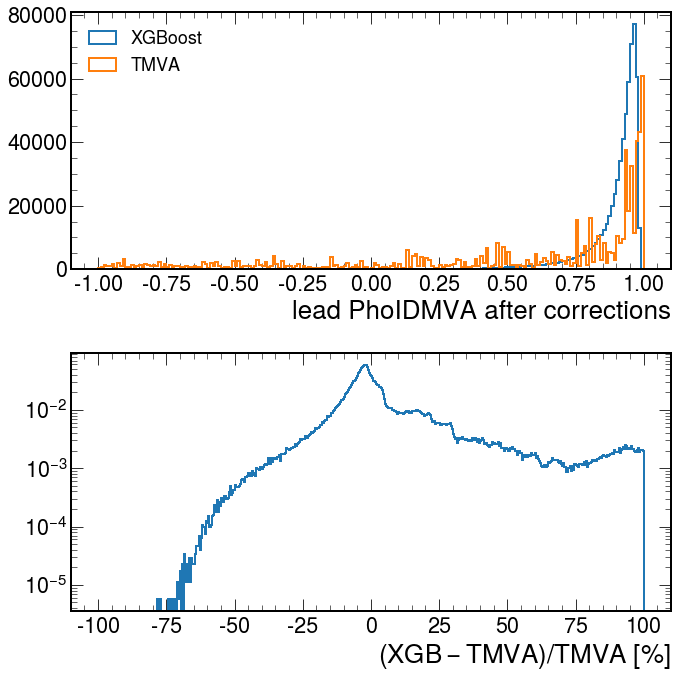

In [87]:
bins = 200
rng = (-1, 1)

fig, (up, down) = plt.subplots(
    nrows=2,
    ncols=1,
    gridspec_kw={"height_ratios": (1, 1)}
    )
    
n, n_, n__ = up.hist(lead_idmva_xgboost, bins=bins, range=rng, histtype="step", label="XGBoost", linewidth=2)
m, m_, m__ = up.hist(lead_idmva_tmva, bins=bins, range=rng, histtype="step", label="TMVA", linewidth=2)
    
up.set_xlabel("lead PhoIDMVA after corrections")
up.legend(fontsize=18, loc="upper left")
    
down.hist(100 * (lead_idmva_xgboost - lead_idmva_tmva) / lead_idmva_tmva, 
          bins=500,
          range=(-100, 100),
          histtype="step",
          density=True,
          linewidth=2
         )
down.set_xlabel("$(XGB - TMVA)/TMVA$ [%]")
down.set_yscale("log")
    
fig.tight_layout()

#fig.savefig("{}/nano_cfr_tmva.png".format(output_dir), bbox_inches='tight')
#fig.savefig("{}/nano_cfr_tmva.pdf".format(output_dir), bbox_inches='tight')